# Задание

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
dt = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False) # Указываем путь к файлу
questions = dt.iloc[0]
dt.drop(0, inplace=True)

## Задание 1

Узнай самый часто встречаемый возраст респондентов

In [2]:
#Version 1
print(dt['Q2'].value_counts().index[0])
#Version 2
# dt.describe()['Q2'].iloc[2]
#Version 3
# print('Самый часто встречаемый возраст респондентов - %s' % dt["Q2"].mode()[0])  Находит самый часто повторяющееся значения

'18-21'

## Задание 2

Посчитай долю женщин среди русских участником опроса, которые уже не студенты. Результат округли до 2х цифры после запятой

In [7]:
# Version 1. Доля женщин (не студентов) среди русских участников опроса (без привязки к студентчеству)
f1 = len(dt[(dt['Q3'] == 'Woman') & (dt['Q4'] == 'Russia') & (dt['Q5'] == 'No')])
f2 = len(dt[dt['Q4'] == 'Russia'])
round(f1 / f2, 2)

0.12

In [8]:
# Version 2. Доля женщин (без привязки к студентчеству) среди русских участников (не студентов) опроса
f1 = len(dt[(dt['Q3'] == 'Woman') & (dt['Q4'] == 'Russia')])
f2 = len(dt[(dt['Q4'] == 'Russia') & (dt['Q5'] == 'No')])
round(f1 / f2, 2)

0.48

In [9]:
# Version 3. Доля женщин (не студентов) среди русских участников (не студентов) опроса
f1 = len(dt[(dt['Q3'] == 'Woman') & (dt['Q4'] == 'Russia') & (dt['Q5'] == 'No')])
f2 = len(dt[(dt['Q4'] == 'Russia') & (dt['Q5'] == 'No')])
round(f1 / f2, 2)

0.24

## Задание 3

Найди среднее время заполнения опроса в **минутах**. Результат округли до 2х знаков после запятой

In [10]:
dt['Duration (in seconds)'] = dt['Duration (in seconds)'].astype(int)
round(dt['Duration (in seconds)'].mean() / 60, 2)
# round((dt['Duration (in seconds)'].sum() / dt['Duration (in seconds)'].count()) / 60, 2)

168.17

## Задание 4

Выведи топ-3 образовательных курса, которые указали респонденты. P.S Это вопрос Q6

In [156]:
new_list = [i for i in questions.index[:] if i.startswith('Q6')]
my_list = [(questions[i].split(' - ')[-1], dt[i].dropna().count()) for i in new_list]
print(', '.join(i[0] for i in (sorted(my_list, key=lambda x: x[1], reverse=True)[:3])))

Coursera, University Courses (resulting in a university degree), Kaggle Learn Courses


In [141]:
# Чисто по приколу
print(', '.join(i[0] for i in (sorted([(questions[i].split(' - ')[-1], dt[i].dropna().count()) for i in [i for i in questions.index[:] if i.startswith('Q6')]], key=lambda x: x[1], reverse=True)[:3])))

Coursera, University Courses (resulting in a university degree), Kaggle Learn Courses


## Задание 5

Узнай топ-5 языков программирования, которые регулярно используют Data Scientists в своей работе

In [1]:
new_dt = dt[dt['Q23'] == 'Data Scientist'].loc[:,'Q12_1':'Q12_15']
a = new_dt.melt().dropna().value_counts()
a = a.index.get_level_values(1)[:5]
print(', '.join(a.array))

NameError: name 'dt' is not defined

## Задание 6

Узнай средний доход 'Data Scientist' и 'Machine Learning/ MLops Engineer' \
Т.к в колонке Q29 у на промежуток, то возьмите среднее значение из промежкутка. Например '15,000-19,999' - 17500, '125,000-149,999' - 137500. >$1,000,000 - оставляем 1000000

In [17]:
# Version 1
a1 = dt[(dt['Q23'] == 'Data Scientist')].loc[:, 'Q29']
a2 = dt[(dt['Q23'] == 'Machine Learning/ MLops Engineer')].loc[:, 'Q29']
my_dict = {'$0-999': 500, '1,000-1,999': 1500, '2,000-2,999': 2500,
           '3,000-3,999': 3500, '4,000-4,999': 4500, '5,000-7,499': 6250,
           '7,500-9,999': 8750, '10,000-14,999': 12500, '15,000-19,999': 17500,
           '20,000-24,999': 22500, '25,000-29,999': 27500, '30,000-39,999': 35000,
           '40,000-49,999': 45000, '50,000-59,999': 55000, '60,000-69,999': 65000,
           '70,000-79,999': 75000, '80,000-89,999': 85000, '90,000-99,999': 95000,
           '100,000-124,999': 112500, '125,000-149,999': 137500, '150,000-199,999': 175000,
           '200,000-249,999': 225000, '250,000-299,999': 275000, '300,000-499,999': 400000,
           '$500,000-999,999': 750000, '>$1,000,000': 1000000}
a1 = a1.map(my_dict).value_counts()
a2 = a2.map(my_dict).value_counts()
print(round(sum(a1.iloc[:] * a1.index[:]) / sum(a1[:]), 2))
print(round(sum(a2.iloc[:] * a2.index[:]) / sum(a2[:]), 2))

70337.24
67437.75


In [3]:
# Version 2
a1 = dt[(dt['Q23'] == 'Data Scientist')].loc[:, 'Q29'].dropna()
a2 = dt[(dt['Q23'] == 'Machine Learning/ MLops Engineer')].loc[:, 'Q29'].dropna()
a1 = a1.value_counts().reset_index()
for i, j in enumerate(a1['index']):
    j = j.translate(str.maketrans('', '', '$,>')).split('-')
    if len(j) == 1:
        a1.loc[i, 'index'] = int(j[0])
    else:
        a1.loc[i, 'index'] = (sum(map(int, j)) + 1) / 2
        
a2 = a2.value_counts().reset_index()
for i, j in enumerate(a2['index']):
    j = j.translate(str.maketrans('', '', '$,>')).split('-')
    if len(j) == 1:
        a2.loc[i, 'index'] = int(j[0])
    else:
        a2.loc[i, 'index'] = (sum(map(int, j)) + 1) / 2
print(round(sum(a1.loc[:, 'index'] * a1.loc[:, 'Q29']) / sum(a1.loc[:, 'Q29']), 2))
print(round(sum(a2.loc[:, 'index'] * a2.loc[:, 'Q29']) / sum(a2.loc[:, 'Q29']), 2))

,index,Q29
0,$0-999,164
1,"40,000-49,999",118
2,"150,000-199,999",112
3,"100,000-124,999",111
4,"10,000-14,999",101
5,"30,000-39,999",98
6,"50,000-59,999",94
7,"1,000-1,999",90
8,"125,000-149,999",89
9,"60,000-69,999",71


## Задание 7 - Дополнительное задание

Найдите какой-нибудь интересный инсайт из этих данных. Пишите свои интересные инсайты в чат проекта с хэштегом.
#инсайт

Автор самого интересного инсайта получит p2p баллы. Поверь, они тебе понадобятся

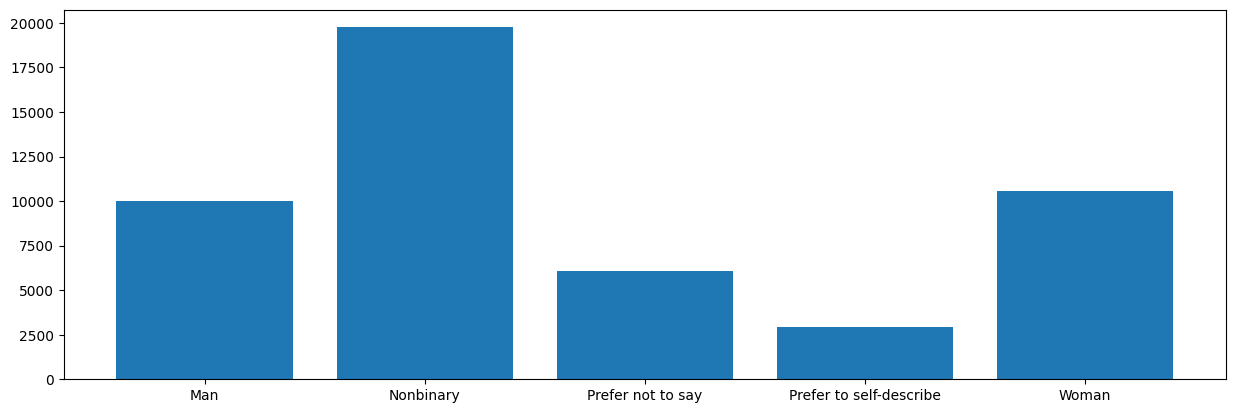

In [85]:
dt['Duration (in seconds)'] = dt['Duration (in seconds)'].astype(int)
new_dt = dt.loc[:, ['Duration (in seconds)', 'Q3']]
a = new_dt.groupby('Q3')['Duration (in seconds)'].mean()
fig , ax = plt.subplots()
ax.bar(a.index[:], a[:])
fig.set_figwidth(15)

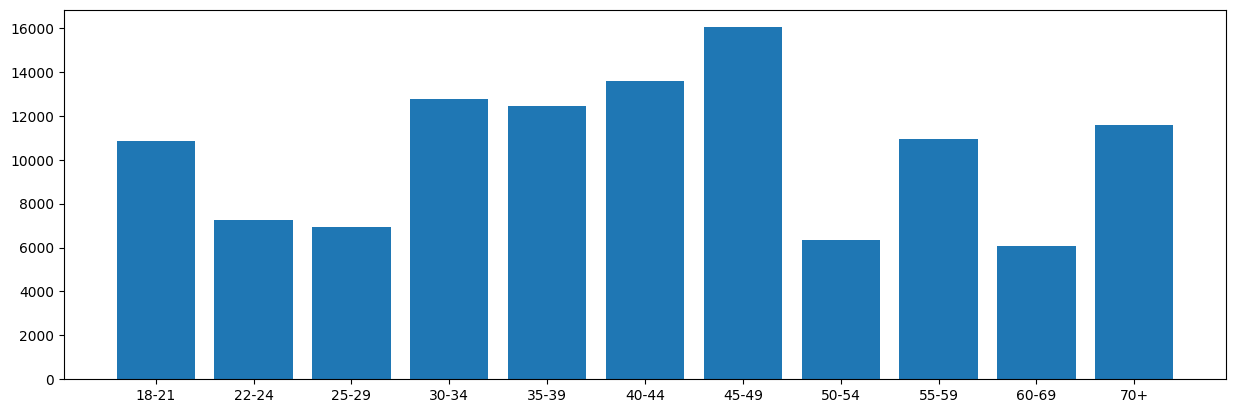

In [89]:
new_dt = dt.loc[:, ['Duration (in seconds)', 'Q2']]
a = new_dt.groupby('Q2')['Duration (in seconds)'].mean()
fig , ax = plt.subplots()
ax.bar(a.index[:], a[:])
fig.set_figwidth(15)

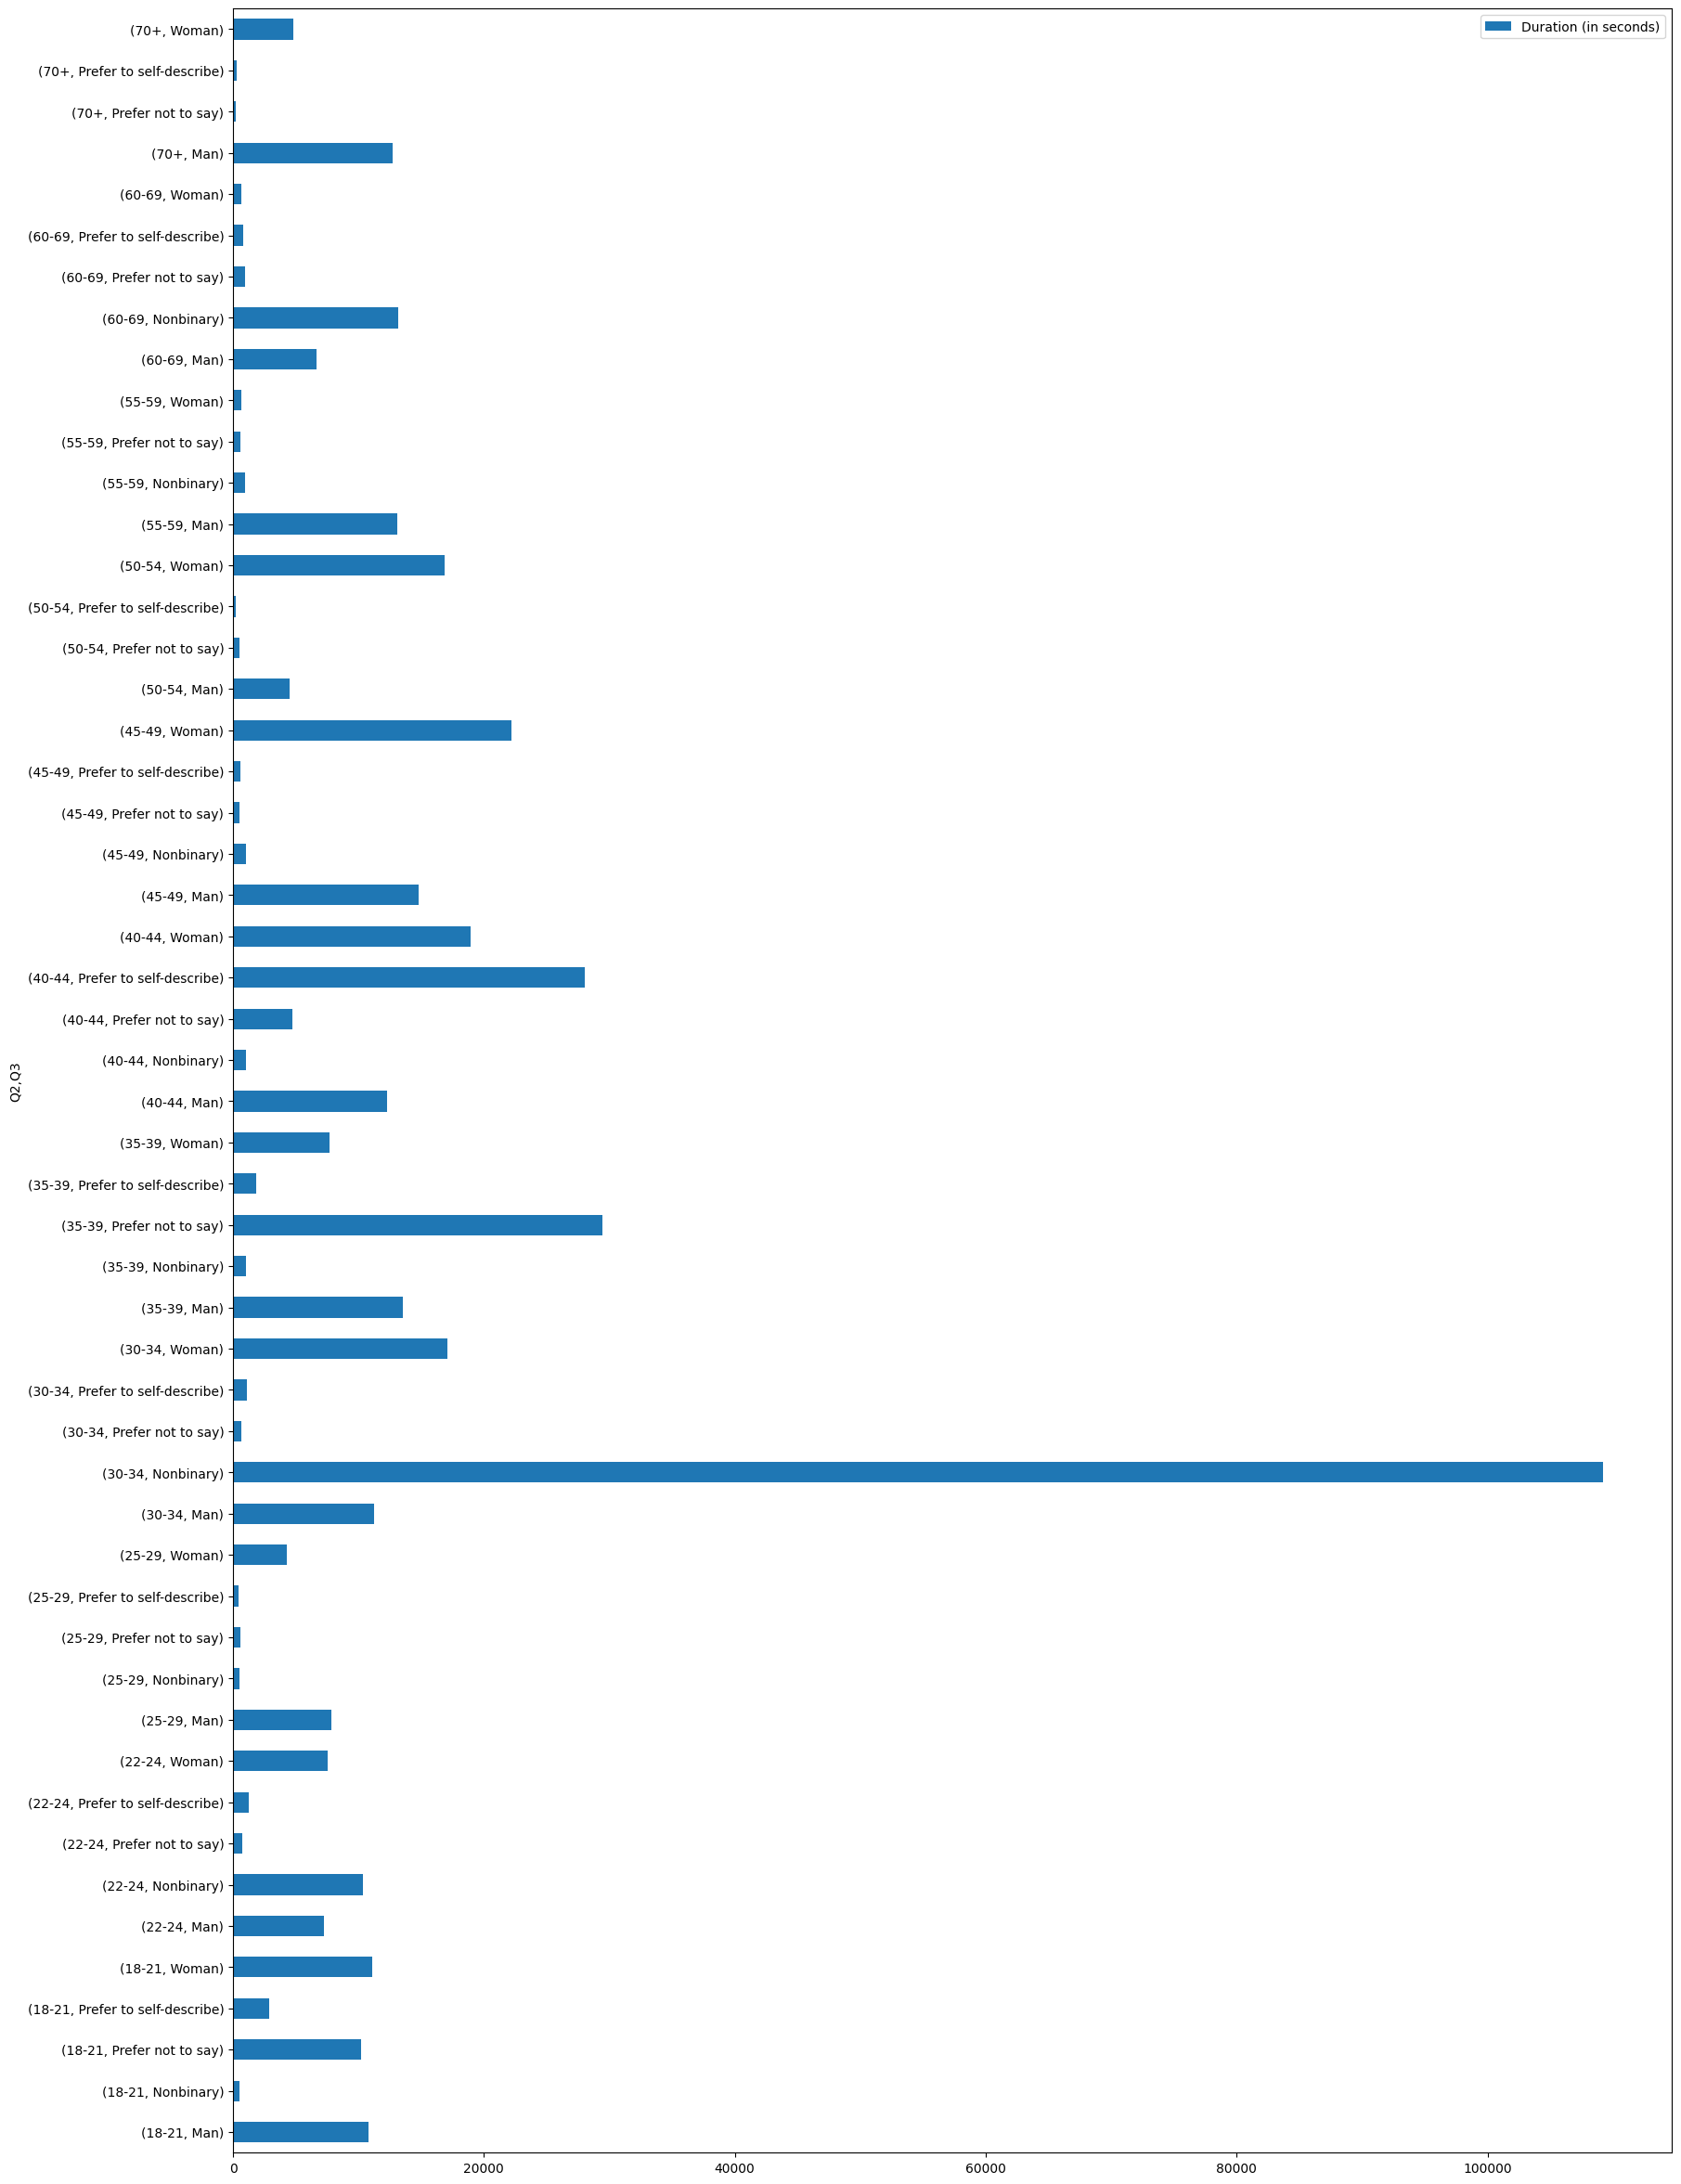

In [185]:
new_dt = dt.loc[:, ['Duration (in seconds)', 'Q2', 'Q3']]
new_dt = new_dt.set_index(['Q2', 'Q3'])
a = new_dt.groupby(['Q2', 'Q3']).mean()
fig , ax = plt.subplots()
a.plot.barh(ax=ax, capsize=4, rot=0)
fig.set_figwidth(20)
fig.set_figheight(30)

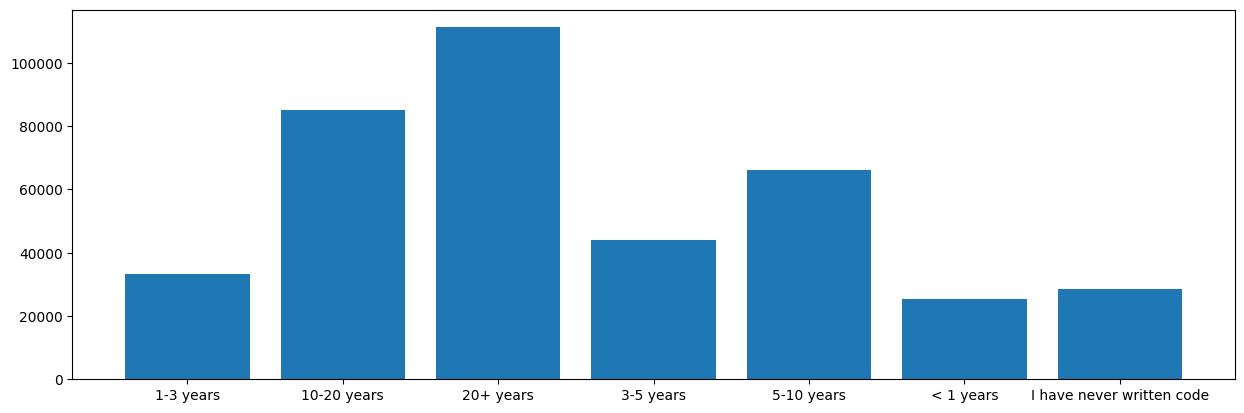

In [22]:
new_dt = dt.loc[:, ['Q11', 'Q29']].dropna()

for i in new_dt.index:
    num = new_dt.loc[i, 'Q29'].translate(str.maketrans('', '', '$,>')).split('-')
    if len(num) == 1:
        new_dt.loc[i, 'Q29'] = int(num[0])
    else:
        new_dt.loc[i, 'Q29'] = (sum(map(int, num)) + 1) / 2
a = new_dt.groupby('Q11')['Q29'].mean()
fig , ax = plt.subplots()
ax.bar(a.index[:], a[:])
fig.set_figwidth(15)

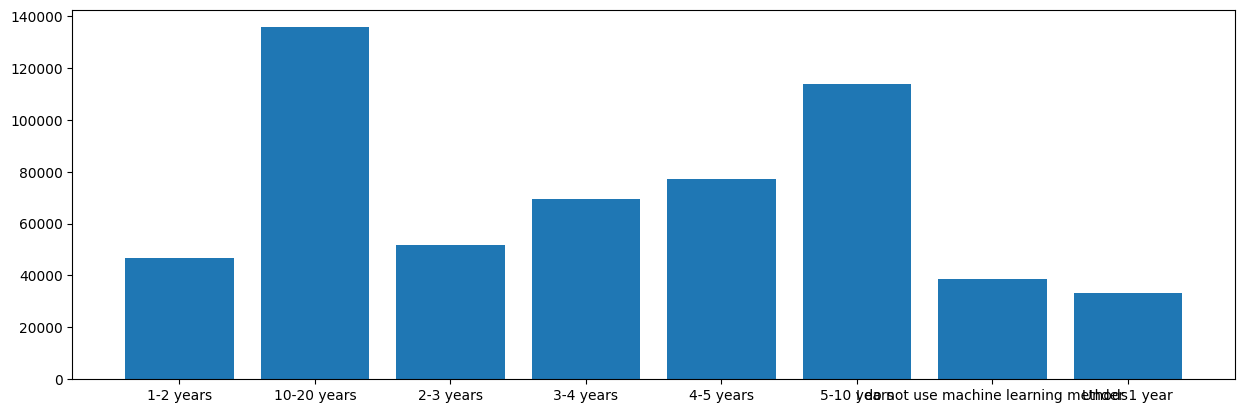

In [297]:
new_dt = dt.loc[:, ['Q16', 'Q29']].dropna()
new_dt[:50]
for i in new_dt.index:
    num = new_dt.loc[i, 'Q29'].translate(str.maketrans('', '', '$,>')).split('-')
    if len(num) == 1:
        new_dt.loc[i, 'Q29'] = int(num[0])
    else:
        new_dt.loc[i, 'Q29'] = (sum(map(int, num)) + 1) / 2
a = new_dt.groupby('Q16')['Q29'].mean()
fig , ax = plt.subplots()
ax.bar(a.index[:], a[:])
fig.set_figwidth(15)